In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# 1

def to_lower(text):
    return text.lower()

# 2

contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

# 3

def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# 4

def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# 5

def to_strip(text):
    return " ".join(text.split())

def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

# 6

snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

# 7

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)


In [3]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\spam_or_not_spam.csv')
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [4]:
df['email'] = df['email'].astype(str)

In [5]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

## PREPROCESS 1

In [6]:
df['email_clean1'] = df['email'].apply(to_lower)
df['email_clean2'] = df['email_clean1'].apply(main_contraction)
df['email_clean3'] = df['email_clean2'].apply(remove_numbers)
df['email_clean4'] = df['email_clean3'].apply(to_strip)
df['email_clean5'] = df['email_clean4'].apply(remove_stopwords)

In [7]:
df.head()

,email,label,email_clean1,email_clean2,email_clean3,email_clean4,email_clean5
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numbe...,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin posted tassos papadopoulos greek sculpt...
2,man threatens explosion in moscow thursday aug...,0,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion moscow thursday august...
3,klez the virus that won t die already the most...,0,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez virus die already prolific virus ever kle...
4,in adding cream to spaghetti carbonara which ...,0,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which h...,adding cream spaghetti carbonara effect pasta ...


## PREPROCESS 2

- stem
- lema
- tf idf

### STEM & LEMA

In [9]:
df['email_stem'] = df['email_clean5'].apply(stem)
df['email_lema'] = df['email_clean5'].apply(lemmatize)
df.head()

,email,label,email_clean1,email_clean2,email_clean3,email_clean4,email_clean5,email_stem,email_lema
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numbe...,date wed number aug number number number numbe...,date wed number aug number number number numbe...,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin posted tassos papadopoulos greek sculpt...,martin post tasso papadopoulo greek sculptor b...,martin posted tasso papadopoulos greek sculpto...
2,man threatens explosion in moscow thursday aug...,0,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion moscow thursday august...,man threaten explos moscow thursday august num...,man threatens explosion moscow thursday august...
3,klez the virus that won t die already the most...,0,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez virus die already prolific virus ever kle...,klez virus die alreadi prolif virus ever klez ...,klez virus die already prolific virus ever kle...
4,in adding cream to spaghetti carbonara which ...,0,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which h...,adding cream spaghetti carbonara effect pasta ...,ad cream spaghetti carbonara effect pasta make...,adding cream spaghetti carbonara effect pasta ...


### TF IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
asd = df['email_clean5']
asd_list = asd.values.tolist()


In [12]:
vect = TfidfVectorizer()
vect.fit(asd_list)

TfidfVectorizer()

In [13]:
dtm_tf_idf = vect.transform(asd_list)

In [14]:
dtm_tf_idf

<3000x33967 sparse matrix of type '<class 'numpy.float64'>'
	with 262798 stored elements in Compressed Sparse Row format>

In [16]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(), columns = vect.get_feature_names())
dtm_tf_idF

NameError: name 'dtm_tf_idF' is not defined

## TEXT EXPLORATION

### WORD FREQ

In [17]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus


def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

<AxesSubplot:ylabel='kata'>

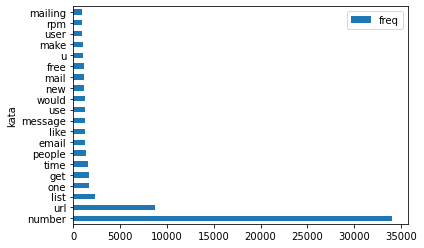

In [18]:
df_w_f = kamus(df['email_lema'])
df_w_f[:20].plot(kind='barh')

<AxesSubplot:ylabel='kata'>

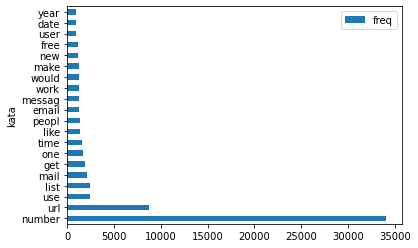

In [19]:
df_w_f = kamus(df['email_stem'])
df_w_f[:20].plot(kind='barh')

## WORD CLOUD

In [20]:
from wordcloud import WordCloud

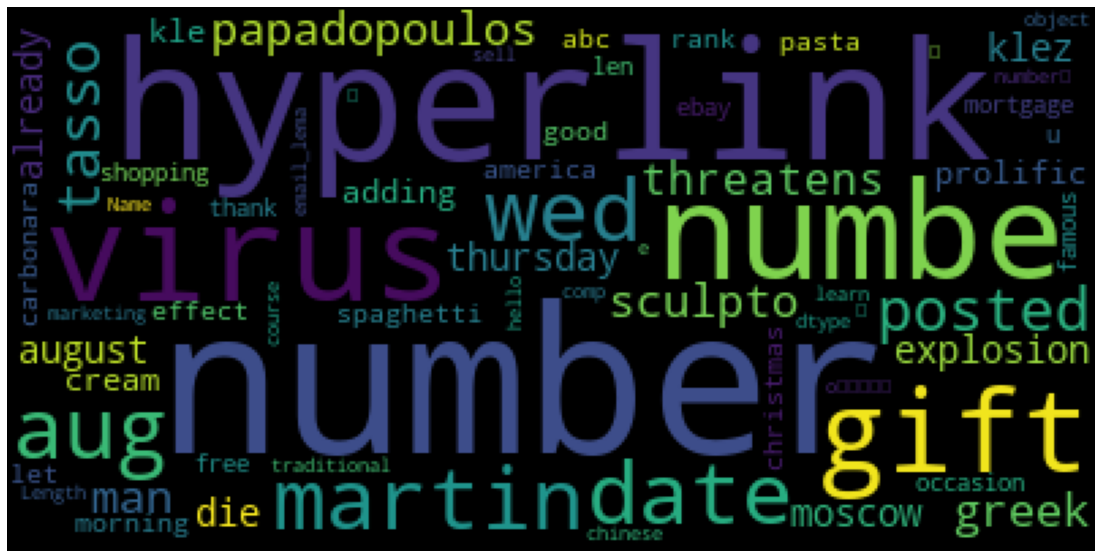

In [21]:
word_cloud = WordCloud().generate(str(df['email_lema']))
plot_cloud(word_cloud)

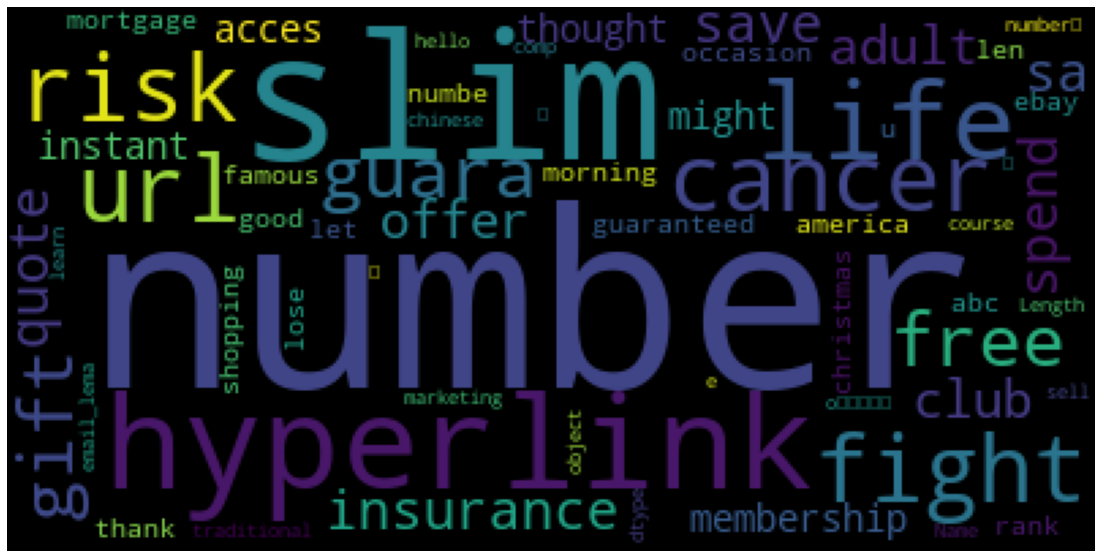

In [22]:
word_cloud = WordCloud().generate(str(df[df['label'] == 1]['email_lema']))
plot_cloud(word_cloud)

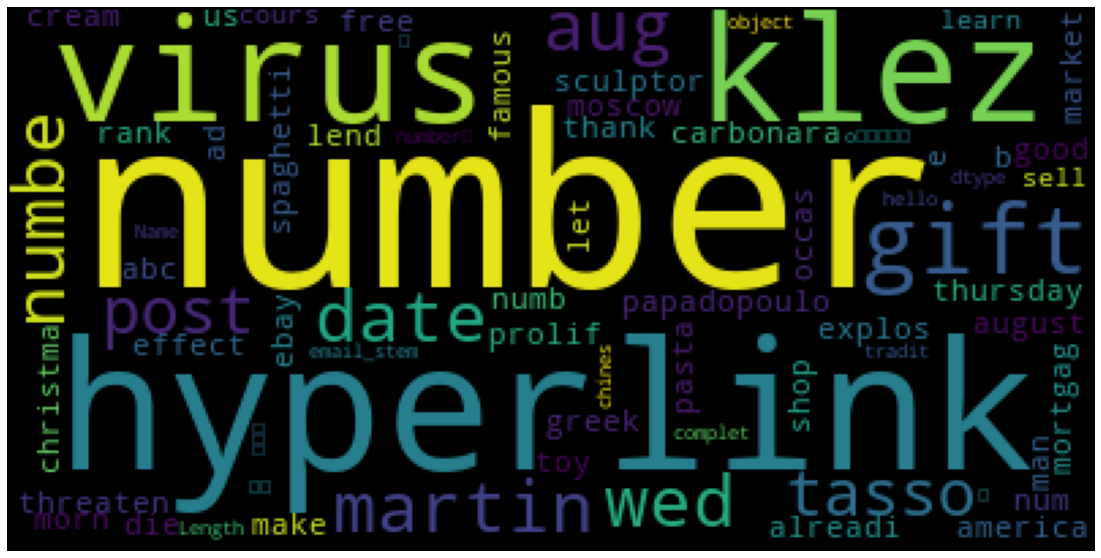

In [23]:
word_cloud = WordCloud().generate(str(df['email_stem']))
plot_cloud(word_cloud)

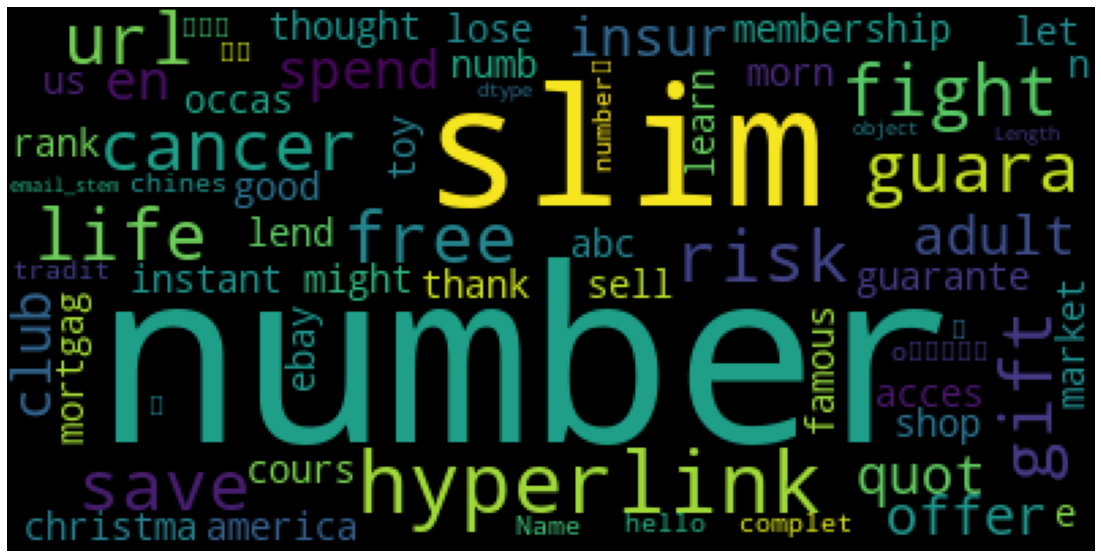

In [24]:
word_cloud = WordCloud().generate(str(df[df['label'] == 1]['email_stem']))
plot_cloud(word_cloud)

## SENTENCES LENGTH

In [25]:
df['length'] = df['email'].apply(len)

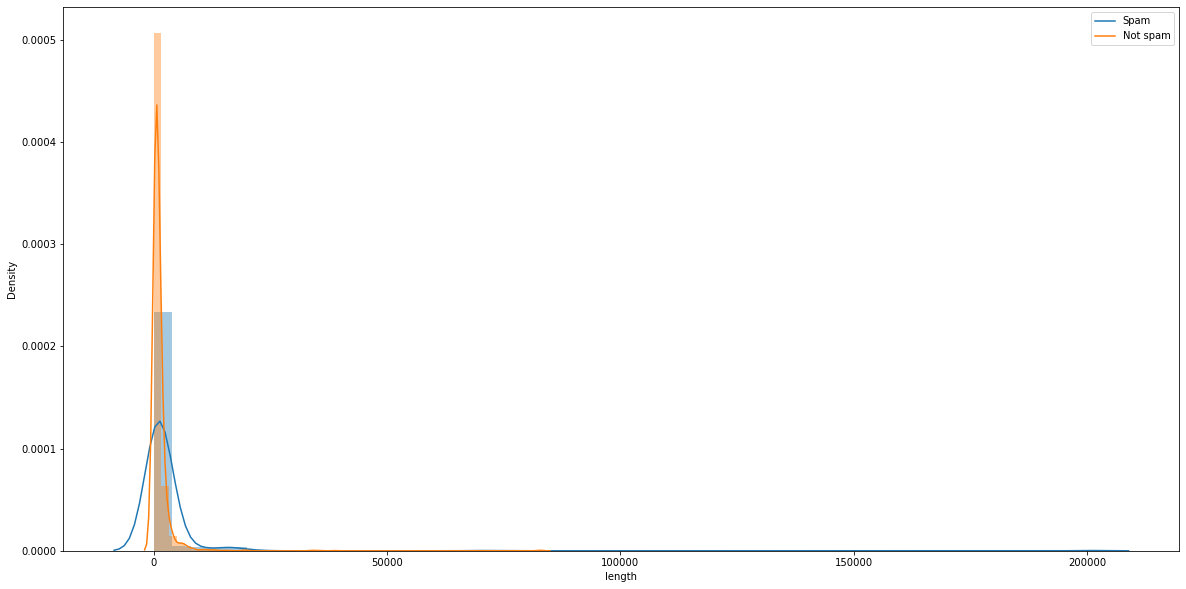

In [26]:
plt.figure(figsize=(20,10))
df_email_spam = df[df['label'] == 1]
df_email_nspam = df[df['label'] == 0]

sns.distplot(df_email_spam ['length'])
sns.distplot(df_email_nspam ['length'])

plt.legend(['Spam', 'Not spam'])

plt.show()

## TEXT CLASSIFICATION

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
email = df['email_lema']
y = df['label']

In [29]:
email_train, email_test, y_train, y_test = train_test_split(
    email,
    y,
    stratify = y,
    random_state = 0
)

## PREP

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
dtm_tf = CountVectorizer()
x_train = dtm_tf.fit_transform(email_train)
x_test = dtm_tf.transform(email_test)

## MODEL BENCHMARK

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [33]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       625
           1       0.55      0.57      0.56       125

    accuracy                           0.85       750
   macro avg       0.73      0.74      0.73       750
weighted avg       0.85      0.85      0.85       750



In [34]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred2 = model.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       625
           1       0.80      0.84      0.82       125

    accuracy                           0.94       750
   macro avg       0.88      0.90      0.89       750
weighted avg       0.94      0.94      0.94       750



In [35]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred3 = model.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       625
           1       1.00      0.90      0.95       125

    accuracy                           0.98       750
   macro avg       0.99      0.95      0.97       750
weighted avg       0.98      0.98      0.98       750



In [36]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred4 = model.predict(x_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       625
           1       0.96      0.88      0.92       125

    accuracy                           0.97       750
   macro avg       0.97      0.94      0.95       750
weighted avg       0.97      0.97      0.97       750



## HYPERPARAMETER TUNING

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [38]:
dtm_tf_idf = TfidfVectorizer()
model = LogisticRegression()

pipe_line = Pipeline([
    ('prep', dtm_tf_idf),
    ('clf', model)
])

param_grid = {
    'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

skf = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    pipe_line,
    param_grid,
    cv = skf,
    n_jobs = -1
)

In [39]:
grid_search.fit(email_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001,
                                    0.0001]})

In [40]:
print('Best score', grid_search.best_score_)
print('Best params', grid_search.best_params_)

Best score 0.9884444444444445
Best params {'clf__C': 1000}


## COMPARISON

BEFORE

In [41]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred3 = model.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       625
           1       1.00      0.90      0.95       125

    accuracy                           0.98       750
   macro avg       0.99      0.95      0.97       750
weighted avg       0.98      0.98      0.98       750



AFTER

In [42]:
y_pred5 = grid_search.best_estimator_.predict(email_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       625
           1       1.00      0.91      0.95       125

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.97       750
weighted avg       0.99      0.99      0.99       750



## Stem

In [43]:
email_stem = df['email_stem']
y = df['label']

In [44]:
email_stem_train, email_stem_test, y_train, y_test = train_test_split(
    email,
    y,
    stratify = y,
    random_state = 0
)

In [45]:
dtm_tf = CountVectorizer()
x_train = dtm_tf.fit_transform(email_stem_train)
x_test = dtm_tf.transform(email_stem_test)

In [46]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred3 = model.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       625
           1       1.00      0.90      0.95       125

    accuracy                           0.98       750
   macro avg       0.99      0.95      0.97       750
weighted avg       0.98      0.98      0.98       750

